In [82]:
import pandas as pd
import numpy as np
from numpy import nan, NaN,NAN
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import datetime
import matplotlib.dates

In [2]:
delv=pd.read_csv("delhivery_data.txt")

In [3]:
df=delv.copy()
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.shape

(144867, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
#Find number of missing values in each columns
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

## **There are missing values in Source_name and Destination_name.Marking them as Unknown**

In [7]:
df["source_name"]=df["source_name"].fillna("Unknown")
df["destination_name"]=df["destination_name"].fillna("Unknown")

## **Drop the unknown fields like is_cutoff,cutoff_factor,cutoff_timestamp,factor,segment_factor**

In [8]:
df.drop(columns=["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"],inplace=True)

In [9]:
#convert to datetime datatype
df["trip_creation_time"]=pd.to_datetime(df["trip_creation_time"])
df["od_start_time"]=pd.to_datetime(df["od_start_time"])
df["od_end_time"]=pd.to_datetime(df["od_end_time"])


In [10]:
#extract month and year from trip_creation_time .New feature added trip_creation_mon ,trip_creation_year and trip_creation_day
df["trip_creation_mon"]=df["trip_creation_time"].dt.month_name()
df["trip_creation_year"]=df["trip_creation_time"].dt.year
df["trip_creation_day"]=df["trip_creation_time"].dt.day_name()

In [11]:
#Convert all time fields from mins to hrs
df["start_scan_to_end_scan"]=df["start_scan_to_end_scan"]/60
df["actual_time"]=df["actual_time"]/60
df["osrm_time"]=df["osrm_time"]/60
df["segment_actual_time"]=df["segment_actual_time"]/60
df["segment_osrm_time"]=df["segment_osrm_time"]/60

In [46]:
#categorical columns
cat_col=df.dtypes=='object'
cat_col=list(cat_col[cat_col].index)
cat_col.remove('trip_uuid')
cat_col.remove("source_center")
cat_col.remove("destination_center")
cat_col.remove("route_schedule_uuid")
cat_col

['data',
 'route_type',
 'source_name',
 'destination_name',
 'trip_creation_mon',
 'trip_creation_day']

In [49]:
# %unique value counts
for c in cat_col:
    if c=='source_name' or c=='destination_name':
        continue
    else:
        print(round(df[c].value_counts(normalize=True)*100),2)
        print("*"*50)

training    72.0
test        28.0
Name: data, dtype: float64 2
**************************************************
FTL        69.0
Carting    31.0
Name: route_type, dtype: float64 2
**************************************************
September    88.0
October      12.0
Name: trip_creation_mon, dtype: float64 2
**************************************************
Wednesday    18.0
Thursday     14.0
Friday       14.0
Tuesday      14.0
Saturday     14.0
Monday       14.0
Sunday       12.0
Name: trip_creation_day, dtype: float64 2
**************************************************


## **The given dataset is for two months September(88%) and October(12%) for the year 2018**
## **69% of data is FTL and 31% is Carting**
## **18% trips happen on Wednesday and least on Sunday**

In [14]:
"""Grouping the data based on Trip id,source and destination id.For each group the segmnent's osrm time and distances
are summed while for the actual time and distances the last row for the group is picked since in the original dataset
they are computed cumulatively.The result is stored in df_sd.This Dataframe has the dependent variables of time and distances
"""
df_sd=df.groupby(["trip_uuid","source_center","destination_center"])[["segment_actual_time","segment_osrm_time","segment_osrm_distance","actual_time","osrm_time","osrm_distance","actual_distance_to_destination"]].agg({"segment_actual_time":"sum","segment_osrm_time":"sum","segment_osrm_distance":"sum","actual_time":"max","osrm_time":"max","osrm_distance":"max","actual_distance_to_destination":"max"}).reset_index()
df_sd.head(5)

,trip_uuid,source_center,destination_center,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_time,osrm_time,osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,IND209304AAA,IND000000ACB,12.133333,8.900000,670.6205,12.200000,5.816667,446.5496,383.759164
1,trip-153671041653548748,IND462022AAA,IND209304AAA,13.666667,7.900000,649.8528,13.833333,6.566667,544.8027,440.973689
2,trip-153671042288605164,IND561203AAB,IND562101AAA,0.766667,0.433333,28.1995,0.783333,0.433333,28.1994,24.644021
3,trip-153671042288605164,IND572101AAA,IND561203AAB,1.583333,0.650000,55.9899,1.600000,0.700000,56.9116,48.542890
4,trip-153671043369099517,IND000000ACB,IND160002AAC,10.133333,3.850000,317.7408,10.183333,3.533333,281.2109,242.309306


In [15]:
"""df1 is a dataframe created to merge df_sd.so that while merging most of the independent features are picked from df1"""
df1=df.groupby(["trip_uuid","source_center","destination_center"])["data","trip_creation_time","trip_creation_mon","trip_creation_year","trip_creation_day","route_type","source_name","destination_name","od_start_time","od_end_time","start_scan_to_end_scan"].max().reset_index()

df1.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,trip_creation_mon,trip_creation_year,trip_creation_day,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,September,2018,Wednesday,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,21.000000
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,September,2018,Wednesday,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,16.650000
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,September,2018,Wednesday,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,0.966667
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,September,2018,Wednesday,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2.033333
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,September,2018,Wednesday,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,13.900000


In [16]:
"""This is the final dataframe after merging the above two frames.Futhur EDA to be done on this dataframe"""
df_agg=pd.merge(df_sd,df1[["trip_uuid","source_center","destination_center","data","trip_creation_time","trip_creation_mon","trip_creation_year","trip_creation_day","route_type","source_name","destination_name","od_start_time","od_end_time","start_scan_to_end_scan"]],on=["trip_uuid","source_center","destination_center"],how='inner')
df_agg.head(5)

,trip_uuid,source_center,destination_center,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_time,osrm_time,osrm_distance,actual_distance_to_destination,...,trip_creation_time,trip_creation_mon,trip_creation_year,trip_creation_day,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan
0,trip-153671041653548748,IND209304AAA,IND000000ACB,12.133333,8.900000,670.6205,12.200000,5.816667,446.5496,383.759164,...,2018-09-12 00:00:16.535741,September,2018,Wednesday,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,21.000000
1,trip-153671041653548748,IND462022AAA,IND209304AAA,13.666667,7.900000,649.8528,13.833333,6.566667,544.8027,440.973689,...,2018-09-12 00:00:16.535741,September,2018,Wednesday,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,16.650000
2,trip-153671042288605164,IND561203AAB,IND562101AAA,0.766667,0.433333,28.1995,0.783333,0.433333,28.1994,24.644021,...,2018-09-12 00:00:22.886430,September,2018,Wednesday,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,0.966667
3,trip-153671042288605164,IND572101AAA,IND561203AAB,1.583333,0.650000,55.9899,1.600000,0.700000,56.9116,48.542890,...,2018-09-12 00:00:22.886430,September,2018,Wednesday,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2.033333
4,trip-153671043369099517,IND000000ACB,IND160002AAC,10.133333,3.850000,317.7408,10.183333,3.533333,281.2109,242.309306,...,2018-09-12 00:00:33.691250,September,2018,Wednesday,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,13.900000


In [17]:
df_agg.shape


(26368, 21)

In [18]:
"""New feature travel_time(in hrs) added .this is time taken between od_start_time and od_end_time"""
df_agg["travel_time"]=df_agg["od_end_time"]-df_agg["od_start_time"]
df_agg["travel_time"]=round(df_agg["travel_time"]/datetime.timedelta(hours=1),2)

In [19]:
df_agg.describe().T

,count,mean,std,min,25%,50%,75%,max
segment_actual_time,26368.0,3.314385,6.354720,0.150000,0.833333,1.383333,2.766667,75.066667
segment_osrm_time,26368.0,1.694689,3.594182,0.100000,0.416667,0.700000,1.316667,32.300000
segment_osrm_distance,26368.0,125.423680,285.932556,9.072900,28.471300,45.944400,91.351975,2640.924700
actual_time,26368.0,3.344837,6.414227,0.150000,0.850000,1.400000,2.800000,75.533333
osrm_time,26368.0,1.517881,3.096514,0.100000,0.416667,0.650000,1.216667,28.100000
osrm_distance,26368.0,115.252837,254.069218,9.072900,27.839750,43.760400,86.467200,2326.199100
actual_distance_to_destination,26368.0,92.540646,209.478657,9.001351,21.727218,35.244189,66.043534,1927.447705
trip_creation_year,26368.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
start_scan_to_end_scan,26368.0,4.971311,7.342693,0.333333,1.516667,2.533333,5.116667,131.633333
travel_time,26368.0,4.979340,7.342634,0.350000,1.520000,2.540000,5.120000,131.640000


## **Looking at the mean,median and max values ,suggests there could be outliers lets check one of the feature(travel time) first and go on to the rest**

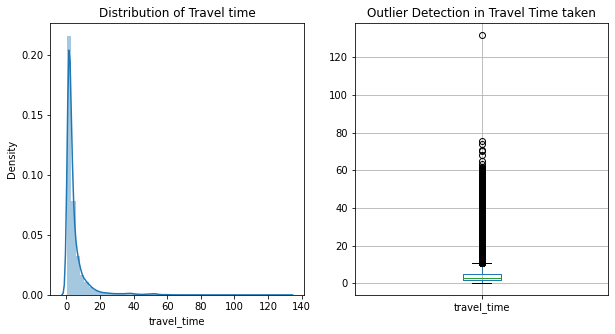

In [38]:
plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(121)
plt.title("Distribution of Travel time")
sns.distplot(df_agg["travel_time"])
plt.subplot(122)
plt.title("Outlier Detection in Travel Time taken")
df_agg.boxplot("travel_time")
plt.show()

## **The distribution seems to be lognormal and the outliers in the boxplot can be due to the skewness in data.let's recheck wether the distribution is Log normal using a QQplot**

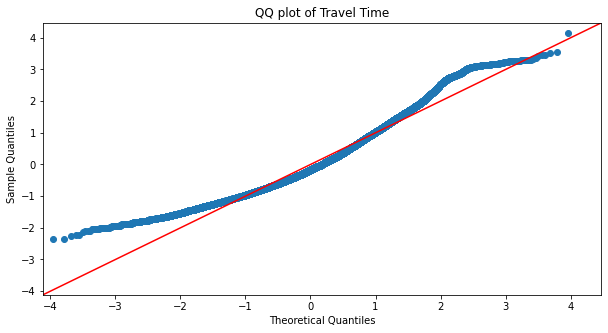

In [39]:

fig=sm.qqplot(np.log(df_agg["travel_time"]),line='45',fit=True)
plt.title("QQ plot of Travel Time")
plt.show()

## **The QQplot suggests that travel time is not a Log normal Distribution.Thus the outliers to be treated**

## **Introducing a custom function IQR_Detect to find outliers in other numerical columns.Input Parameters-Dataframe,column.Output-Distribution plot,Boxplot,QQplot and percentage outliers of the column**

In [22]:
num_col=df_agg.dtypes=='float64'
num_col=list(num_col[num_col].index)
num_col

['segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'actual_distance_to_destination',
 'start_scan_to_end_scan',
 'travel_time']

In [23]:
def IQR_Detect(dataframe,col):
    print("*"*50)
    plt.subplot(121)
    print("Plot1:Distribution of ",col)
    sns.distplot(dataframe[col])
    plt.subplot(122)
    print("Plot2:Outlier Detection in",col)
    dataframe.boxplot(col)
    plt.show()
    fig=sm.qqplot(np.log(dataframe[col]),line='45',fit=True)
    print("Plot3:QQ plot of ",col)
    plt.show()
    q1=dataframe[col].quantile(.25)
    q3=dataframe[col].quantile(.75)
    iqr=1.5*stats.iqr(dataframe[col])
    outlier_df=dataframe.loc[(dataframe[col]<q1-iqr)|(dataframe[col]>iqr+q3)]
    percent_out=round(len(outlier_df)*100/len(dataframe),2)
    print(percent_out,'% of data in column ',col,' is outlier data')

**************************************************
Plot1:Distribution of  segment_actual_time
Plot2:Outlier Detection in segment_actual_time


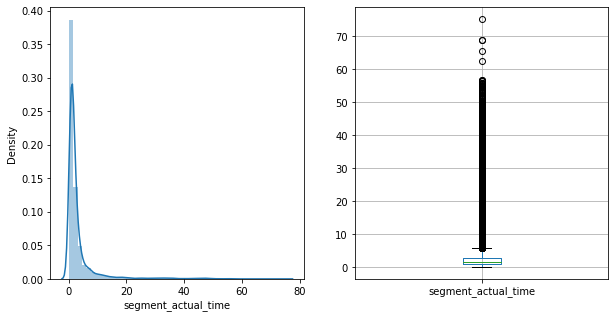

Plot3:QQ plot of  segment_actual_time


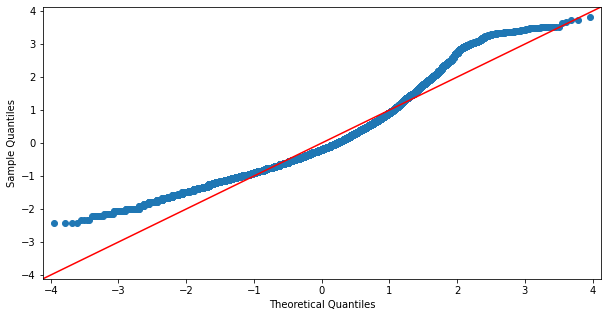

11.98 % of data in column  segment_actual_time  is outlier data
**************************************************
Plot1:Distribution of  segment_osrm_time
Plot2:Outlier Detection in segment_osrm_time


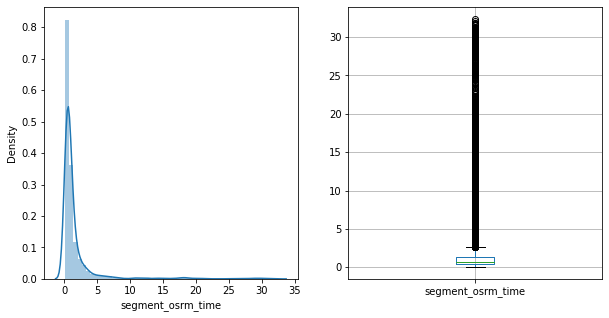

Plot3:QQ plot of  segment_osrm_time


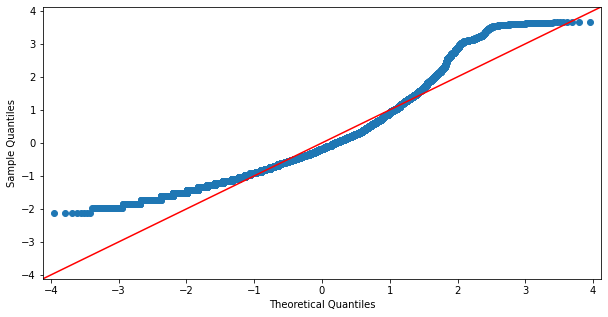

11.97 % of data in column  segment_osrm_time  is outlier data
**************************************************
Plot1:Distribution of  segment_osrm_distance
Plot2:Outlier Detection in segment_osrm_distance


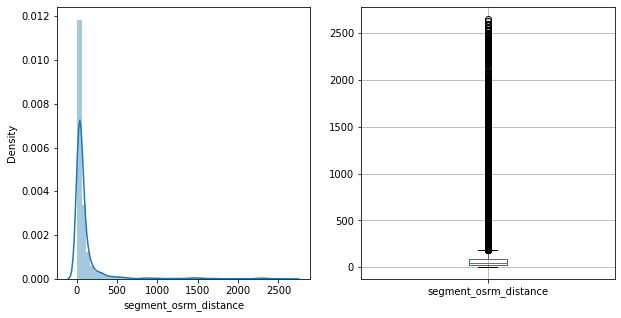

Plot3:QQ plot of  segment_osrm_distance


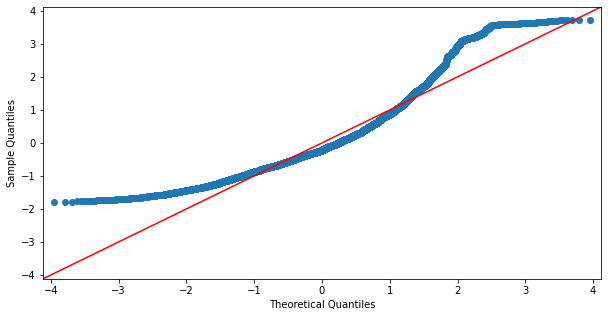

11.78 % of data in column  segment_osrm_distance  is outlier data
**************************************************
Plot1:Distribution of  actual_time
Plot2:Outlier Detection in actual_time


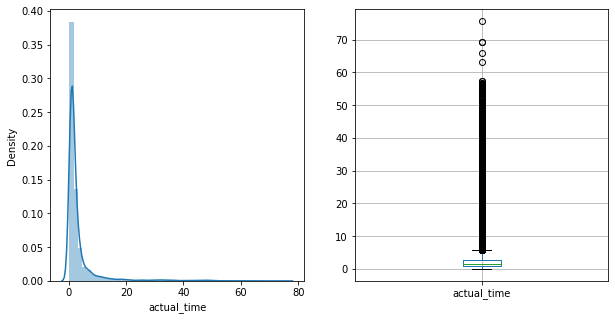

Plot3:QQ plot of  actual_time


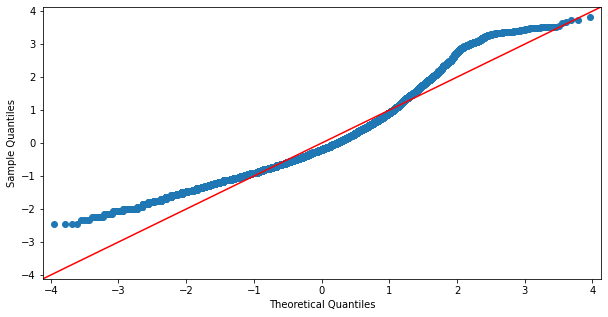

11.95 % of data in column  actual_time  is outlier data
**************************************************
Plot1:Distribution of  osrm_time
Plot2:Outlier Detection in osrm_time


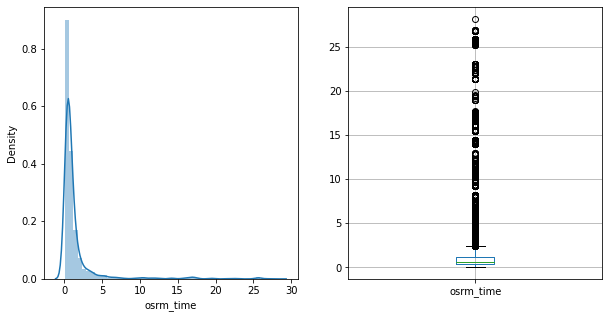

Plot3:QQ plot of  osrm_time


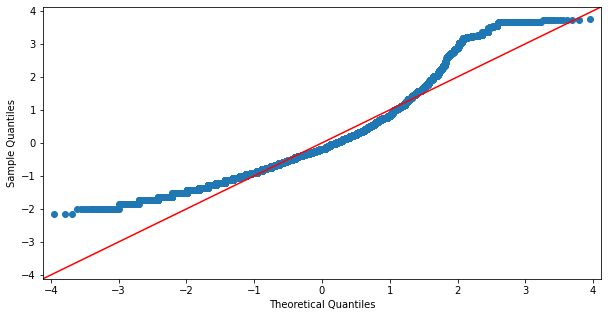

11.0 % of data in column  osrm_time  is outlier data
**************************************************
Plot1:Distribution of  osrm_distance
Plot2:Outlier Detection in osrm_distance


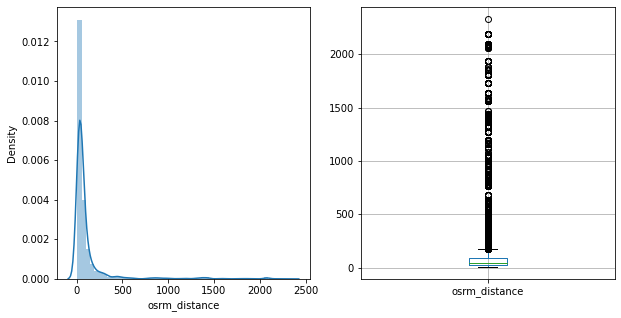

Plot3:QQ plot of  osrm_distance


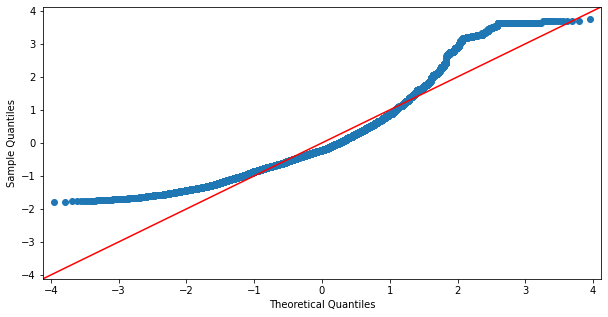

11.65 % of data in column  osrm_distance  is outlier data
**************************************************
Plot1:Distribution of  actual_distance_to_destination
Plot2:Outlier Detection in actual_distance_to_destination


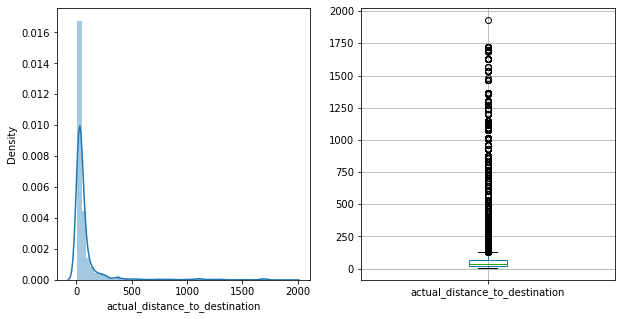

Plot3:QQ plot of  actual_distance_to_destination


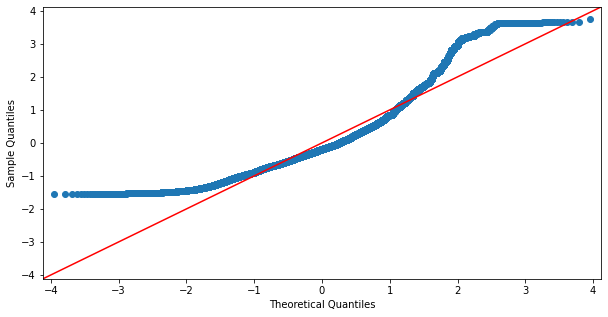

12.45 % of data in column  actual_distance_to_destination  is outlier data
**************************************************
Plot1:Distribution of  start_scan_to_end_scan
Plot2:Outlier Detection in start_scan_to_end_scan


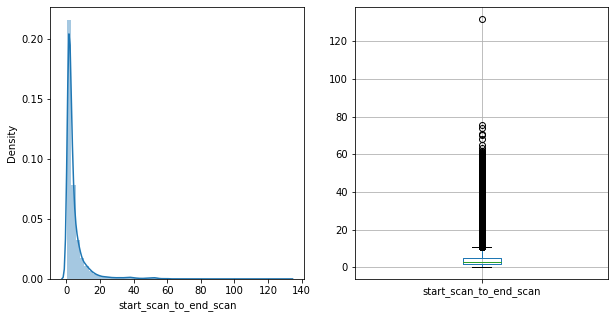

Plot3:QQ plot of  start_scan_to_end_scan


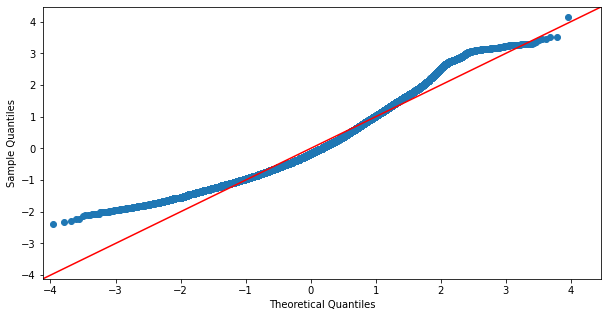

10.35 % of data in column  start_scan_to_end_scan  is outlier data
**************************************************
Plot1:Distribution of  travel_time
Plot2:Outlier Detection in travel_time


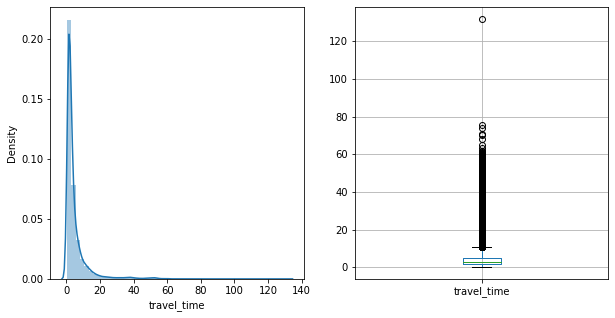

Plot3:QQ plot of  travel_time


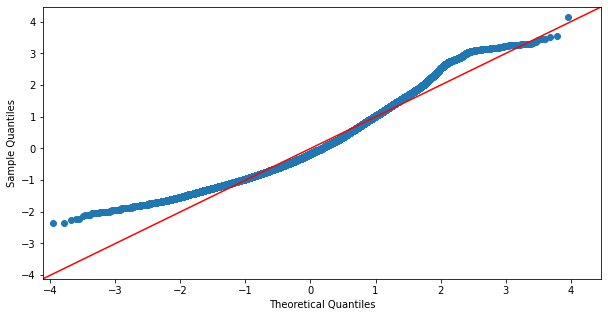

10.33 % of data in column  travel_time  is outlier data


In [40]:
for c in num_col:
    IQR_Detect(df_agg,c)

## **All the numerical features has almost same amount of outliers ,the distribution also looks similar.Hence removing outliers from one column can  bring about a same change to other numercal columns.Lets remove the outliers from column Travel time**

In [25]:
#Outlier Removal
q1=df_agg["travel_time"].quantile(.25)
q3=df_agg["travel_time"].quantile(.75)
iqr=1.5*stats.iqr(df_agg["travel_time"])
df_agg_clean=df_agg.loc[(df_agg["travel_time"]>q1-iqr)&(df_agg["travel_time"]<=iqr+q3)]


In [26]:
df_agg_clean.shape

(23643, 22)

In [289]:
#Before Outlier removal
df_agg.describe().T

,count,mean,std,min,25%,50%,75%,max
segment_actual_time,26368.0,3.314385,6.354720,0.150000,0.833333,1.383333,2.766667,75.066667
segment_osrm_time,26368.0,1.694689,3.594182,0.100000,0.416667,0.700000,1.316667,32.300000
segment_osrm_distance,26368.0,125.423680,285.932556,9.072900,28.471300,45.944400,91.351975,2640.924700
actual_time,26368.0,3.344837,6.414227,0.150000,0.850000,1.400000,2.800000,75.533333
osrm_time,26368.0,1.517881,3.096514,0.100000,0.416667,0.650000,1.216667,28.100000
osrm_distance,26368.0,115.252837,254.069218,9.072900,27.839750,43.760400,86.467200,2326.199100
actual_distance_to_destination,26368.0,92.540646,209.478657,9.001351,21.727218,35.244189,66.043534,1927.447705
trip_creation_year,26368.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
start_scan_to_end_scan,26368.0,4.971311,7.342693,0.333333,1.516667,2.533333,5.116667,131.633333
travel_time,26368.0,4.979340,7.342634,0.350000,1.520000,2.540000,5.120000,131.640000


In [27]:
#After outlier removal
df_agg_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
segment_actual_time,23643.0,1.777697,1.517312,0.150000,0.800000,1.266667,2.183333,10.416667
segment_osrm_time,23643.0,0.918934,0.859238,0.100000,0.400000,0.633333,1.066667,9.983333
segment_osrm_distance,23643.0,63.424882,62.273331,9.072900,27.382000,42.266700,72.692100,725.377200
actual_time,23643.0,1.794571,1.528832,0.150000,0.800000,1.266667,2.200000,10.433333
osrm_time,23643.0,0.838284,0.713474,0.100000,0.400000,0.600000,1.000000,6.166667
osrm_distance,23643.0,59.431465,55.325413,9.072900,26.740850,40.822600,70.228450,497.581000
actual_distance_to_destination,23643.0,46.774533,44.875432,9.001351,20.935029,32.192760,54.374739,403.226215
trip_creation_year,23643.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
start_scan_to_end_scan,23643.0,3.031281,2.202487,0.333333,1.433333,2.266667,3.916667,10.683333
travel_time,23643.0,3.039284,2.201925,0.350000,1.440000,2.270000,3.920000,10.520000


## **The above is the statistical info before and  after outlier removal.The mean ,median looks closer than before**

In [28]:
df_agg_clean.describe(include='object')

,trip_uuid,source_center,destination_center,data,trip_creation_mon,trip_creation_day,route_type,source_name,destination_name
count,23643,23643,23643,23643,23643,23643,23643,23643,23643
unique,13574,1463,1460,2,2,7,2,1454,1450
top,trip-153710494321650505,IND000000ACB,IND000000ACB,training,September,Wednesday,Carting,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana)
freq,8,636,617,16942,20755,4353,12141,636,617


## **Gurgaon is the busiest spot.Most trips are created on Wednesdays**


## **Hypothesis Test between Travel time and Osrm time**

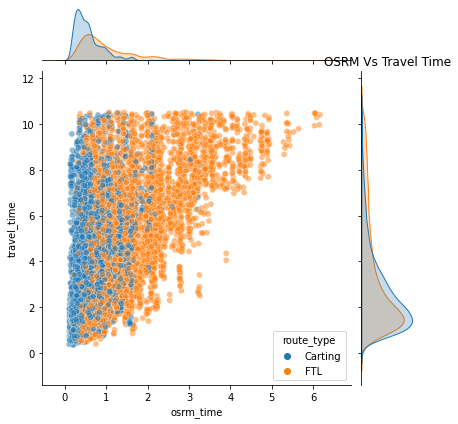

In [37]:

sns.jointplot(x="osrm_time",y='travel_time',data=df_agg_clean,hue="route_type",alpha=.5)
plt.title("OSRM Vs Travel Time")
plt.show()

## **The plot suggests they seem to be correlated.Lets recheck this using spearman rank correlation coefficient Test**

In [30]:
#df1-dataframe for FTL route type,df2-dataframe for Carting route type.Conduct Spearman rank correlation test for osrm and travel time for these two groups 
df1=df_agg_clean.loc[df_agg_clean["route_type"]=='FTL']
df2=df_agg_clean.loc[df_agg_clean["route_type"]=="Carting"]
print("Null Hypothesis-OSRM and Travel time are uncorrelated")
print("Alternate Hypothesis-the correlation is positive")
print("Spearman rank correlation for FTL route type",stats.spearmanr(df1["osrm_time"],df1["travel_time"],alternative='greater'))
print("Spearman rank correlation for Carting route type",stats.spearmanr(df2["osrm_time"],df2["travel_time"],alternative='greater'))
print("OSRM and Travel time are positively correalted.The corelation is more for FTL route type .Rejecting Null hypothesis")

Null Hypothesis-OSRM and Travel time are uncorrelated
Alternate Hypothesis-the correlation is positive
Spearman rank correlation for FTL route type SpearmanrResult(correlation=0.7667033981481818, pvalue=0.0)
Spearman rank correlation for Carting route type SpearmanrResult(correlation=0.5112181520058369, pvalue=0.0)
OSRM and Travel time are positively correalted.The corelation is more for FTL route type .Rejecting Null hypothesis


## **From the distribution plot of travel time and OSRM time it is evident that some packages took very long time to reach their destinations eventhough their OSRM time estimated was less.Lets dig a bit deeper to this and see wether we can draw some insights.As a threshold lets find out the trips which took 10 times more than estimated OSRM time**

In [43]:
#df3-datframe which contains trips that took 10 times more than the estimated OSRM time
df3=df_agg_clean.loc[df_agg_clean["travel_time"]>(df_agg_clean["osrm_time"]*10)]
df3.shape

(1467, 22)

In [66]:
for c in cat_col[1:]:
    print(df3[c].value_counts().head(10))
    print("*"*50)

Carting    1200
FTL         267
Name: route_type, dtype: int64
**************************************************
Bhiwandi_Mankoli_HB (Maharashtra)     155
Bangalore_Nelmngla_H (Karnataka)       49
Mumbai Hub (Maharashtra)               47
Ahmedabad_East_H_1 (Gujarat)           44
Mumbai_Chndivli_PC (Maharashtra)       38
Aluva_Peedika_H (Kerala)               33
Kanpur_Central_H_6 (Uttar Pradesh)     32
Noida_Sector02_C (Uttar Pradesh)       31
Pune_Tathawde_H (Maharashtra)          24
Vellore_GndhiNgr_IP (Tamil Nadu)       21
Name: source_name, dtype: int64
**************************************************
Bhiwandi_Mankoli_HB (Maharashtra)    123
Hyderabad_Shamshbd_H (Telangana)      45
Mumbai Hub (Maharashtra)              44
Bengaluru_Peenya_L (Karnataka)        42
Mumbai_Sanpada_I (Maharashtra)        33
Mumbai_East_I_21 (Maharashtra)        33
Surat_Central_I_4 (Gujarat)           31
Del_Okhla_PC (Delhi)                  31
Gurgaon_Bilaspur_HB (Haryana)         30
Kolkata_Dankun

## **The above non-graphical representation depicts some of the places which took longer transit time than expected the highest number of times .For instance whenever Bhiwandi_Mankoli_HB (MH) has been the source or destination the transit time has gone way longer than expected.Similar is tha case for places like Bangalore_Nelmngla,Hyderabad_Shamshbd etc**

In [115]:
#create time bins 
bins = [0, 6, 12, 18, 24]

# add custom labels 
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']

# add the bins to the dataframe
df3['start_time_bin'] = pd.cut(df3["od_start_time"].dt.hour, bins, labels=labels, right=False)
df3['end_time_bin'] = pd.cut(df3["od_end_time"].dt.hour, bins, labels=labels, right=False)

In [119]:
df3

,trip_uuid,source_center,destination_center,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_time,osrm_time,osrm_distance,actual_distance_to_destination,...,trip_creation_day,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,travel_time,start_time_bin,end_time_bin
22347,trip-153827050923071983,IND152101AAA,IND152026AAA,0.866667,0.766667,34.6875,0.883333,0.600000,46.7592,30.036689,...,Sunday,FTL,Giddarbaha_DC (Punjab),Muktsar_DPC (Punjab),2018-09-30 04:21:02.259090,2018-09-30 14:49:45.271635,10.466667,10.48,00:00-05:59,12:00-17:59
919,trip-153678248395755588,IND788026AAC,IND788151AAA,0.883333,0.366667,29.7862,0.883333,0.366667,29.7862,21.434210,...,Wednesday,FTL,Silchar_Sirikona_H (Assam),Hailakandi_kalibari_D (Assam),2018-09-12 20:01:23.957887,2018-09-13 06:28:29.618054,10.450000,10.45,18:00-23:59,06:00-11:59
14037,trip-153765774930456559,IND563125AAB,IND560300AAB,1.716667,0.816667,54.3099,1.733333,0.800000,53.8769,43.458421,...,Saturday,Carting,Chintamani_Central_D_2 (Karnataka),Bangalore_East_I_20 (Karnataka),2018-09-23 04:23:57.337731,2018-09-23 14:48:13.686803,10.400000,10.40,00:00-05:59,12:00-17:59
553,trip-153674668820131930,IND000000AEL,IND000000ACB,5.950000,0.983333,65.0903,5.983333,0.983333,63.4528,50.746091,...,Wednesday,Carting,Delhi_PunjabiB_L (Delhi),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 10:04:48.201546,2018-09-12 20:27:56.448795,10.383333,10.39,06:00-11:59,18:00-23:59
12333,trip-153756165847998463,IND000000ACB,IND000000AEL,2.300000,1.266667,78.6078,2.333333,1.033333,60.8621,50.388921,...,Friday,Carting,Gurgaon_Bilaspur_HB (Haryana),Delhi_PunjabiB_L (Delhi),2018-09-21 20:27:38.480244,2018-09-22 06:50:57.915384,10.383333,10.39,18:00-23:59,06:00-11:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21433,trip-153819027212623807,IND211002AAB,IND211011AAA,0.433333,0.100000,9.9230,0.433333,0.116667,9.9230,9.529495,...,Saturday,Carting,Allahabad_Central_H_1 (Uttar Pradesh),Allahabad_Central_D_5 (Uttar Pradesh),2018-09-29 03:04:32.126499,2018-09-29 04:27:56.631050,1.383333,1.39,00:00-05:59,00:00-05:59
2994,trip-153690448356819734,IND751015AAA,IND751002AAB,0.233333,0.116667,10.3715,0.233333,0.116667,10.3715,9.165476,...,Friday,Carting,Bhubaneshwar_Nayapalli (Orissa),Bhubaneshwar_Hub (Orissa),2018-09-14 08:56:33.852830,2018-09-14 10:17:55.990780,1.350000,1.36,06:00-11:59,06:00-11:59
17932,trip-153793221526410461,IND211002AAB,IND211011AAA,0.500000,0.116667,10.3266,0.500000,0.116667,10.3266,9.904456,...,Wednesday,Carting,Allahabad_Central_H_1 (Uttar Pradesh),Allahabad_Central_D_5 (Uttar Pradesh),2018-09-26 03:23:35.264359,2018-09-26 04:43:28.933503,1.316667,1.33,00:00-05:59,00:00-05:59
14281,trip-153767159247032747,IND211002AAB,IND211011AAA,0.366667,0.100000,10.4011,0.383333,0.116667,10.4011,9.973983,...,Sunday,Carting,Allahabad_Central_H_1 (Uttar Pradesh),Allahabad_Central_D_5 (Uttar Pradesh),2018-09-23 02:59:52.470616,2018-09-23 04:15:08.246489,1.250000,1.25,00:00-05:59,00:00-05:59


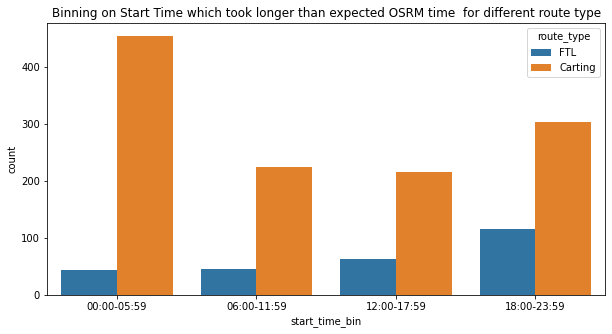

In [125]:
sns.countplot(df3["start_time_bin"],hue=df3["route_type"])
plt.title("Binning on Start Time which took longer than expected OSRM time  for different route type")
plt.show()

## **Recommendation-For Carting route type ,travel time took longer than expected OSRM time when their trip's start time was in between 12:00am and 6:00am.Hence for such type trip need to start on some other point of a day rather than this time.Similary for FTL this happened when start time was in between 6pm and 12am**

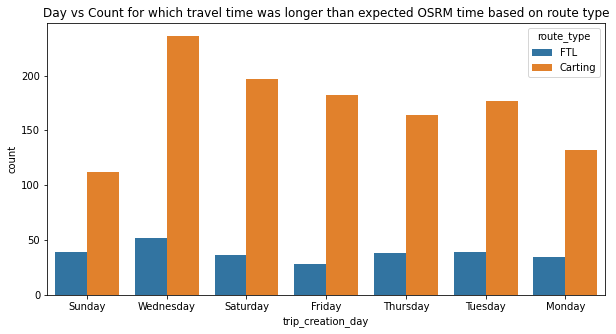

In [126]:
sns.countplot(df3["trip_creation_day"],hue=df3["route_type"])
plt.title("Day vs Count for which travel time was longer than expected OSRM time based on route type" )
plt.show()

## **Recommendation-For Carting route type the trips which occurred on Wednesdays took longer than expected.Hence for such route type its better to do the deliveries on Sundays.For FTL route type it's not much dependent on the days**

## **Next lets try to draw some insights from features related to source_name an destination_name**

In [128]:
#df4 copy of the aggregated dataframe
df4=df_agg_clean.copy()

In [151]:
#Extract state from source name and creating a new feature source_state
sn_list=df4["source_name"].to_list()
state_list=list()
for x in sn_list:

    if x!='Unknown':
        
        sidx=x.index('(')
        eidx=x.index(')')
        state=x[sidx+1:eidx]
    #print(state)
        state_list.append(state)
    else:
        state_list.append('Unknown')

In [148]:
df4["source_state"]=np.array(state_list)

In [152]:
#Extract state from destination_name and create a new feature destination_state
sn_list=df4["destination_name"].to_list()
state_list=list()
for x in sn_list:

    if x!='Unknown':
        
        sidx=x.index('(')
        eidx=x.index(')')
        state=x[sidx+1:eidx]
    #print(state)
        state_list.append(state)
    else:
        state_list.append('Unknown')
df4["destination_state"]=np.array(state_list)

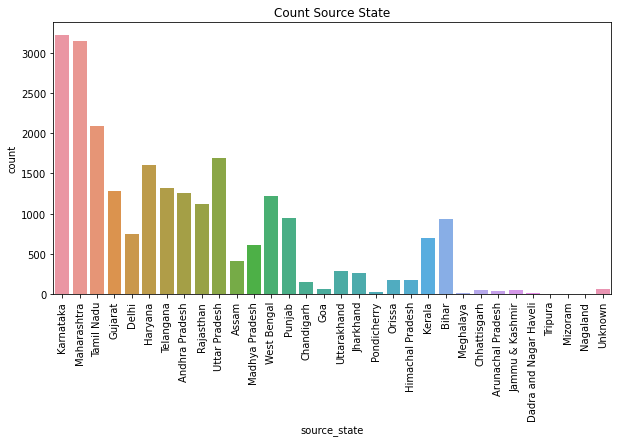

In [161]:

sns.countplot(df4["source_state"])
plt.xticks(rotation=90)
plt.title("Count Source State")
plt.show()


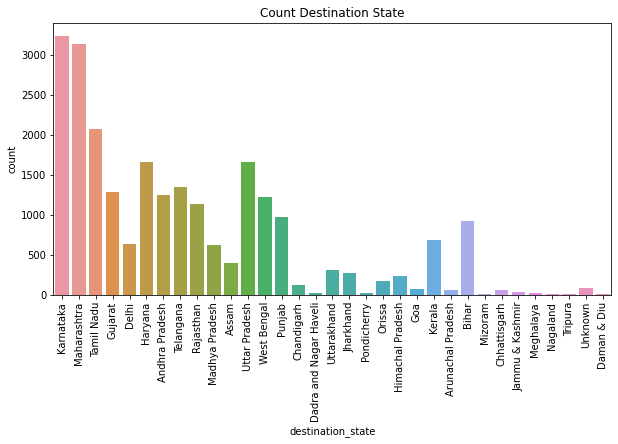

In [162]:
sns.countplot(df4["destination_state"])
plt.xticks(rotation=90)
plt.title("Count Destination State")
plt.show()

## **The largest number of shipments have taken place in Karnataka and Maharashtra.**
## **Recommendation-Strategies need to be taken to improve business in most of the North-Eastern States and the Union territories like more vehicles to be deployed in these areas for delivery**

In [163]:
#New feature source_destination which is concatenation of source_name and destination_name
df4["source_destination"]=df4["source_name"]+df4["destination_name"]

In [167]:
#No:of shipments made between a source-destination combo.Top 20
df4["source_destination"].value_counts().head(20)

Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)     151
Bangalore_Nelmngla_H (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)     126
Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)    121
Bengaluru_KGAirprt_HB (Karnataka)Bangalore_Nelmngla_H (Karnataka)     108
Pune_Tathawde_H (Maharashtra)Bhiwandi_Mankoli_HB (Maharashtra)        107
Bhiwandi_Mankoli_HB (Maharashtra)Mumbai Hub (Maharashtra)             105
Bengaluru_Bomsndra_HB (Karnataka)Bangalore_Nelmngla_H (Karnataka)     102
Delhi_Gateway_HB (Delhi)Gurgaon_Bilaspur_HB (Haryana)                  99
Mumbai_Chndivli_PC (Maharashtra)Bhiwandi_Mankoli_HB (Maharashtra)      99
Gurgaon_Bilaspur_HB (Haryana)Sonipat_Kundli_H (Haryana)                91
Bengaluru_KGAirprt_HB (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)     86
Sonipat_Kundli_H (Haryana)Gurgaon_Bilaspur_HB (Haryana)                85
Bhiwandi_Mankoli_HB (Maharashtra)Mumbai_MiraRd_IP (Maharashtra)        78
Del_Okhla_PC (Delhi)Gurgaon_Bilaspur_H

## **The above non graphical representation shows the top 20 corridors. The busiest corridor is that between Bangalore_Nelmngla_H and Bengaluru_KGAirprt_HB wherein a total of 151 shipments were made**

In [292]:
#No:of shipments made between a source-destination combo.least 20
df4["source_destination"].value_counts().tail(20)

Patran_MheshNGR_D (Punjab)Samana_PODPP_D (Punjab)                      1
Banka_Wardno6_D (Bihar)Kahalgaon_NdiaTola_D (Bihar)                    1
Tezpur_Mhbhirab_D (Assam)Bhalukpong_Khenewa_D (Arunachal Pradesh)      1
Hisar_AgrohDPP_D (Haryana)Fatehabad_SirsaDPP_D (Haryana)               1
Kottayam_Central_H_1 (Kerala)Kothanalloor_Majoor_D (Kerala)            1
Amd_Chandkheda_Dc (Gujarat)Ahmedabad_East_H_1 (Gujarat)                1
Berhampur_Khajuria_I (Orissa)Tangi_SriDPP_D (Orissa)                   1
Shillong (Meghalaya)Guwahati_Hub (Assam)                               1
Uchila_Busstand_D (Karnataka)Kundapura_DC (Karnataka)                  1
Neemrana_Rcocmplx_D (Rajasthan)Narnaul_DC (Haryana)                    1
Barbil_PunjbiPd_D (Orissa)Kendujhar_Sirjudin_D (Orissa)                1
Kozhikode_Feroke_H (Kerala)Vadakara_Mandodi_D (Kerala)                 1
Wanaparthy_VallaDPP_D (Telangana)Unknown                               1
SultnBthry_Kollgpra_D (Kerala)Mananthavady_Central_

## **Recommendation-The above shows some of the least busiest routes.Strategies to be adopted to improve business in these regions**

## **Next let's compute the average distance and travel time for the Top 20 corridors**

In [220]:
#Create a new dataframe df5 which contains the top 20 corridors
df5=df4["source_destination"].value_counts().head(20).to_frame().reset_index()
df5.rename(columns={"source_destination":"count_trips","index":"source_destination"},inplace=True)
df5

,source_destination,count_trips
0,Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAi...,151
1,Bangalore_Nelmngla_H (Karnataka)Bengaluru_Boms...,126
2,Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_KGA...,121
3,Bengaluru_KGAirprt_HB (Karnataka)Bangalore_Nel...,108
4,Pune_Tathawde_H (Maharashtra)Bhiwandi_Mankoli_...,107
5,Bhiwandi_Mankoli_HB (Maharashtra)Mumbai Hub (M...,105
6,Bengaluru_Bomsndra_HB (Karnataka)Bangalore_Nel...,102
7,Delhi_Gateway_HB (Delhi)Gurgaon_Bilaspur_HB (H...,99
8,Mumbai_Chndivli_PC (Maharashtra)Bhiwandi_Manko...,99
9,Gurgaon_Bilaspur_HB (Haryana)Sonipat_Kundli_H ...,91


In [221]:
#New features avg_distance and avg_time to be computed for the top 20 corridors
df5.insert(2,"avg_distance","")
df5.insert(3,"avg_time","")


In [222]:
df5

,source_destination,count_trips,avg_distance,avg_time
0,Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAi...,151,,
1,Bangalore_Nelmngla_H (Karnataka)Bengaluru_Boms...,126,,
2,Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_KGA...,121,,
3,Bengaluru_KGAirprt_HB (Karnataka)Bangalore_Nel...,108,,
4,Pune_Tathawde_H (Maharashtra)Bhiwandi_Mankoli_...,107,,
5,Bhiwandi_Mankoli_HB (Maharashtra)Mumbai Hub (M...,105,,
6,Bengaluru_Bomsndra_HB (Karnataka)Bangalore_Nel...,102,,
7,Delhi_Gateway_HB (Delhi)Gurgaon_Bilaspur_HB (H...,99,,
8,Mumbai_Chndivli_PC (Maharashtra)Bhiwandi_Manko...,99,,
9,Gurgaon_Bilaspur_HB (Haryana)Sonipat_Kundli_H ...,91,,


In [223]:
#Store their name as a list to be used in the for loop below
Y=df5["source_destination"].to_list()
Y

['Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)',
 'Bangalore_Nelmngla_H (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)',
 'Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)',
 'Bengaluru_KGAirprt_HB (Karnataka)Bangalore_Nelmngla_H (Karnataka)',
 'Pune_Tathawde_H (Maharashtra)Bhiwandi_Mankoli_HB (Maharashtra)',
 'Bhiwandi_Mankoli_HB (Maharashtra)Mumbai Hub (Maharashtra)',
 'Bengaluru_Bomsndra_HB (Karnataka)Bangalore_Nelmngla_H (Karnataka)',
 'Delhi_Gateway_HB (Delhi)Gurgaon_Bilaspur_HB (Haryana)',
 'Mumbai_Chndivli_PC (Maharashtra)Bhiwandi_Mankoli_HB (Maharashtra)',
 'Gurgaon_Bilaspur_HB (Haryana)Sonipat_Kundli_H (Haryana)',
 'Bengaluru_KGAirprt_HB (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)',
 'Sonipat_Kundli_H (Haryana)Gurgaon_Bilaspur_HB (Haryana)',
 'Bhiwandi_Mankoli_HB (Maharashtra)Mumbai_MiraRd_IP (Maharashtra)',
 'Del_Okhla_PC (Delhi)Gurgaon_Bilaspur_HB (Haryana)',
 'Mumbai Hub (Maharashtra)Mumbai_MiraRd_IP (Maharashtra)',
 'Ludhiana_MilrGanj_

In [224]:
#For loop to compute the avg distance and avg travel time between the top 20 busiest corridors
for y in Y:
    travel_time_list=[]
    act_dist_list=[]
   
    
    travel_time=df4.loc[df4["source_destination"]==y]["travel_time"]
    travel_time_list.append(travel_time)
    
    act_dist=df4.loc[df4["source_destination"]==y]["actual_distance_to_destination"]
    act_dist_list.append(act_dist)
    
   
    
    avg_dist=np.mean(np.array(act_dist))
    avg_time=np.mean(np.array(travel_time))
   
    
    idx=df5.loc[df5["source_destination"]==y].index
    df5.loc[idx,["avg_distance"]]=avg_dist
    df5.loc[idx,["avg_time"]]=avg_time
   
    
    
    
    

In [225]:
df5

,source_destination,count_trips,avg_distance,avg_time
0,Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAi...,151,28.031635,3.059272
1,Bangalore_Nelmngla_H (Karnataka)Bengaluru_Boms...,126,39.495588,4.576905
2,Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_KGA...,121,41.72738,3.312479
3,Bengaluru_KGAirprt_HB (Karnataka)Bangalore_Nel...,108,28.087494,3.191759
4,Pune_Tathawde_H (Maharashtra)Bhiwandi_Mankoli_...,107,100.882221,5.381402
5,Bhiwandi_Mankoli_HB (Maharashtra)Mumbai Hub (M...,105,21.425833,2.815238
6,Bengaluru_Bomsndra_HB (Karnataka)Bangalore_Nel...,102,39.626143,4.45598
7,Delhi_Gateway_HB (Delhi)Gurgaon_Bilaspur_HB (H...,99,36.912185,4.278182
8,Mumbai_Chndivli_PC (Maharashtra)Bhiwandi_Manko...,99,20.117543,3.361212
9,Gurgaon_Bilaspur_HB (Haryana)Sonipat_Kundli_H ...,91,70.423939,6.51033


## **The above frame give the avg distance and avg travel time taken for the top 20 busiest corridors in the given dataset**

## **Hypothesis test between start_scan_to_end_scan Vs Travel Time**
## **Ho:start_scan_to_end_scan and  Travel Time are uncorrelated**
## **Ha:start_scan_to_end_scan and  Travel Time are positively correlated**
## **Significance level 5%**

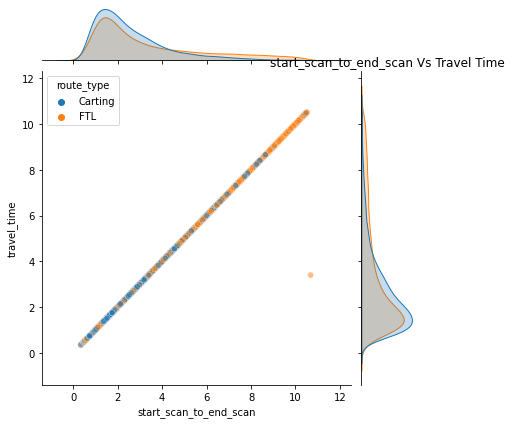

In [33]:
sns.jointplot(x="start_scan_to_end_scan",y='travel_time',data=df_agg_clean,hue="route_type",alpha=.5)
plt.title("start_scan_to_end_scan Vs Travel Time")
plt.show()


In [34]:
#FTL
stats.spearmanr(df1["start_scan_to_end_scan"],df1["travel_time"],alternative='greater')

SpearmanrResult(correlation=0.9999165735729818, pvalue=0.0)

In [35]:
#Carting
stats.spearmanr(df2["start_scan_to_end_scan"],df2["travel_time"],alternative='greater')

SpearmanrResult(correlation=0.9999864645861619, pvalue=0.0)

## **The spearman rank test suggests that the start_scan_to_end_scan and travel_time are almost perfectly linearly correlated for both FTL and Carting with the coefficient=0.999 with p_val < alpha.Hence Reject Ho.Their distribution plots also coveys the same**

## **Hypothesis test between actual_time and segment actual time**
## **Ho:actual_time and segment actual time are uncorrelated**
## **Ha:actual_time and segment actual time are positively correlated**
## **Significance level 5%**

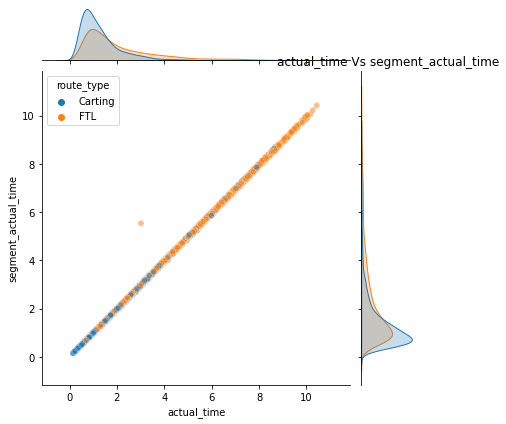

In [227]:
sns.jointplot(x="actual_time",y='segment_actual_time',data=df_agg_clean,hue="route_type",alpha=.5)
plt.title("actual_time Vs segment_actual_time")
plt.show()

In [230]:
#FTL
stats.spearmanr(df1["actual_time"],df1["segment_actual_time"],alternative='greater')

SpearmanrResult(correlation=0.9999250885803729, pvalue=0.0)

In [231]:
#Carting
stats.spearmanr(df2["actual_time"],df2["segment_actual_time"],alternative='greater')

SpearmanrResult(correlation=0.9997665662307961, pvalue=0.0)

## **The spearman rank test suggests that the actual_time and segment_actual_time are almost perfectly linearly correlated for both FTL and Carting with the coefficient=0.999 with p value < alpha.Hence Reject Ho.Their distribution plots also coveys the same**

## **Hypothesis test between actual_time and  osrm_time**
## **Ho:actual_time and  osrm_time are uncorrelated**
## **Ha:actual_time and  osrm_time are positively correlated**
## **Significance level 5%**

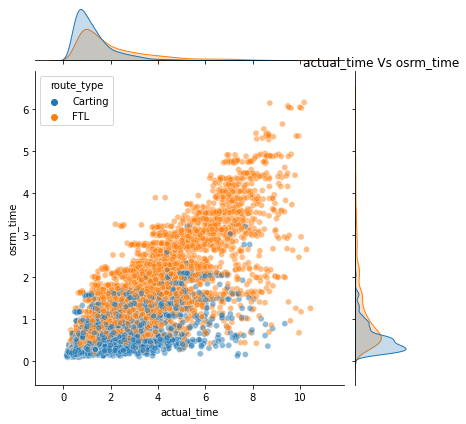

In [232]:
sns.jointplot(x="actual_time",y='osrm_time',data=df_agg_clean,hue="route_type",alpha=.5)
plt.title("actual_time Vs osrm_time")
plt.show()

In [235]:
#FTL
stats.spearmanr(df1["actual_time"],df1["osrm_time"],alternative='greater')

SpearmanrResult(correlation=0.8676137654977552, pvalue=0.0)

In [236]:
#Carting
stats.spearmanr(df2["actual_time"],df2["osrm_time"],alternative='greater')

SpearmanrResult(correlation=0.6895278606679303, pvalue=0.0)

## **Since p_val is less than significance level .Reject Ho.Actual time and Osrm Time are positivey correlated but a stronger positive correlation exists for FTL than carting route type.The Plot also suggests the same**

## **Hypothesis test between osrm distance  and  segment osrm distance**
## **Ho:osrm distance  and  segment osrm distance are uncorrelated**
## **Ha:osrm distance  and  segment osrm distance are positively correlated**
## **Significance level 5%**

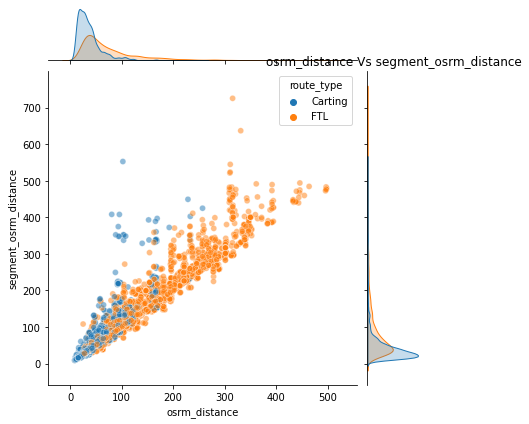

In [237]:
sns.jointplot(x="osrm_distance",y='segment_osrm_distance',data=df_agg_clean,hue="route_type",alpha=.5)
plt.title("osrm_distance Vs segment_osrm_distance")
plt.show()

In [239]:
#FTL
stats.spearmanr(df1["osrm_distance"],df1["segment_osrm_distance"],alternative='greater')

SpearmanrResult(correlation=0.9881720499879001, pvalue=0.0)

In [238]:
#Carting
stats.spearmanr(df2["osrm_distance"],df2["segment_osrm_distance"],alternative='greater')

SpearmanrResult(correlation=0.9786114589444174, pvalue=0.0)

## **Since p_val is less than significance level .Reject Ho.osrm distance  and  segment osrm distance are positively correlated with correlation coefficient as shown above**

## **Hypothesis test between osrm_time and  segment_osrm_time**
## **Ho:osrm_time and  segment_osrm_time are uncorrelated**
## **Ha:osrm_time and  segment_osrm_timedistance are positively correlated**
## **Significance level 5%**

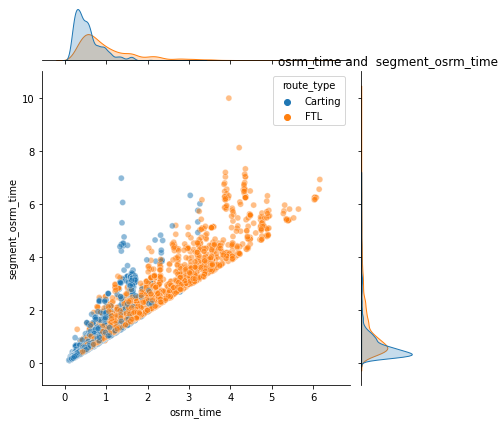

In [240]:
sns.jointplot(x="osrm_time",y='segment_osrm_time',data=df_agg_clean,hue="route_type",alpha=.5)
plt.title("osrm_time and  segment_osrm_time")
plt.show()

In [242]:
#FTL
stats.spearmanr(df1["osrm_time"],df1["segment_osrm_time"],alternative='greater')

SpearmanrResult(correlation=0.9867243745601064, pvalue=0.0)

In [241]:
#Carting
stats.spearmanr(df2["osrm_time"],df2["segment_osrm_time"],alternative='greater')

SpearmanrResult(correlation=0.9752162843185177, pvalue=0.0)

## **Since p_val is less than significance level .Reject Ho.osrm time  and  segment osrm time are positively correlated with correlation coefficient as shown above**

## **One Hot encoding of column Route type**


In [246]:
#use get_dummies method
one_hot_encoded_data = pd.get_dummies(df_agg_clean, columns = ['route_type'])
one_hot_encoded_data.iloc[:,21:23]

,route_type_Carting,route_type_FTL
2,1,0
3,1,0
6,1,0
7,0,1
8,0,1
...,...,...
26363,1,0
26364,1,0
26365,1,0
26366,0,1


## **Find Correlation coefficients between different columns**
## **Convert all categorical to numerical features**

In [281]:
#Copy of the aggregated dataframe
df_corr=df_agg_clean.copy()
df_to_check=df_agg_clean.copy()

In [282]:
#New feature source_destination concat of source_center and destination_center
df_corr["source_destination"]=df_corr["source_center"]+df_corr["destination_center"]
df_to_check["source_destination"]=df_to_check["source_center"]+df_to_check["destination_center"]

In [283]:
#drop unwanted columns
df_corr.drop(["trip_uuid","source_center","source_name","destination_name","destination_center","trip_creation_time","od_start_time","od_end_time","trip_creation_year"],axis=1,inplace=True)

In [284]:
#Label encoding categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ("data","trip_creation_mon","trip_creation_day","route_type","source_destination"):
    df_corr[col]=le.fit_transform(df_corr[col])

In [285]:
#Check the counts with original frame before and after label encoding
for col in ("data","trip_creation_mon","trip_creation_day","route_type","source_destination"):
    print(df_to_check[col].value_counts())
    print(df_corr[col].value_counts())
    print("*"*50)

training    16942
test         6701
Name: data, dtype: int64
1    16942
0     6701
Name: data, dtype: int64
**************************************************
September    20755
October       2888
Name: trip_creation_mon, dtype: int64
1    20755
0     2888
Name: trip_creation_mon, dtype: int64
**************************************************
Wednesday    4353
Thursday     3432
Tuesday      3374
Friday       3366
Saturday     3233
Monday       3131
Sunday       2754
Name: trip_creation_day, dtype: int64
6    4353
4    3432
5    3374
0    3366
2    3233
1    3131
3    2754
Name: trip_creation_day, dtype: int64
**************************************************
Carting    12141
FTL        11502
Name: route_type, dtype: int64
0    12141
1    11502
Name: route_type, dtype: int64
**************************************************
IND562132AAAIND560300AAA    151
IND562132AAAIND560099AAB    126
IND560099AABIND560300AAA    121
IND560300AAAIND562132AAA    108
IND411033AAAIND421302AAG    107
  

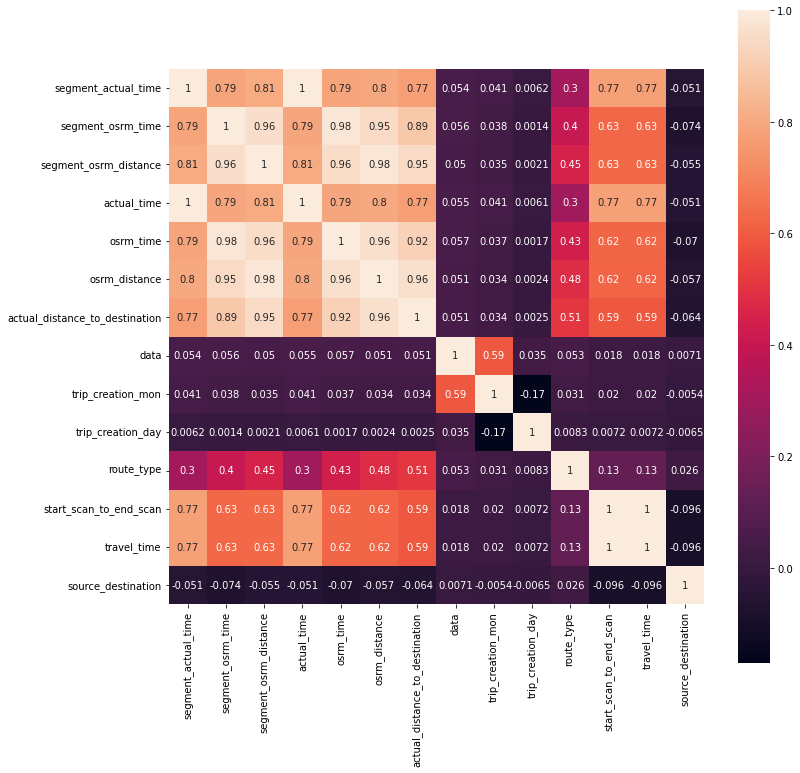

In [286]:
#Heat map of Spearman Rank Correlation Coefficients
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr.corr(method='spearman'),square=True,annot=True)
plt.show()

## **Inferences from Heat Map**
## **The source and destination of the shipments are not correlated with trip dates ie,there is no such criteria on selecting a day on which a trip should be made for a particular source_destination.(SCC~-0.001)**
## **The computed time between a source and destination(travel_time)and start_scan_to_end_scan have a perfect linear relationship**
## **Segment actual time and actual time also have a perfect linear relationship**
## **The day on which a trip is made is mostly independent of all the time and distance features**(SCC~0.001)
## **Almost all the time and distance fields are positively correlated**